# 盐在水中的溶解实验

溶解是物质科学领域涉及的内容，小学科学课程标准给出的相关活动建议包含“观察常见物质在水中的溶解过程”。食盐是最常见、安全、廉价的实验对象，但传统实验方法却因其扩散过程透明不可见，往往安排学生采用生活中不常见的高锰酸钾代替食盐做溶解实验，学生也只能在高锰酸钾溶解实验的基础上通过想象进行认知迁移。

借助虚谷号搭建的SIoT服务器和TDS传感器制作的实验装置，我们可以用数据可视化的方法变通让食盐溶解过程“可见”。 

## 实验装置的材料清单

- 虚谷号×1
- 厚物—虚谷号扩展板×1（可选）
- Gravity: 模拟TDS传感器×1

**TDS传感器简介**

TDS中文名称为总溶解固体（英文：Total dissolved solids，缩写TDS），又称溶解性固体总量，测量单位为毫克/升（mg/L）,它表明1升水中溶有多少毫克溶解性固体。TDS值越高，表示水中含有的溶解物越多。 总溶解固体指水中全部溶质的总量，包括无机物和有机物两者的含量。一般可用电导率值大概了解溶液中的盐份，一般情况下，电导率越高，盐份越高，TDS越高。由于天然水中所含的有机物以及呈分子状的无机物一般可以不考虑，所以一般也把含盐量称为总溶解固体。

实验装置连接实物图

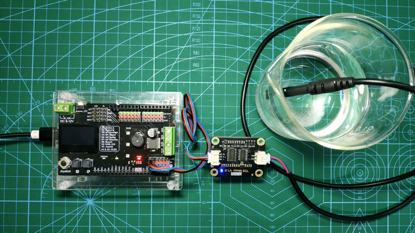

## 准备工作

1.导入库

In [1]:
import siot  #导入siot库
import time  #导入time库
from xugu import Pin # 从 xugu 库中导入 Pin类

not found firmata protocol, burn it.
burn complete

pymata_aio Version 2.28	Copyright (c) 2015-2018 Alan Yorinks All rights reserved.

Using COM Port:/dev/ttyS1

Initializing Arduino - Please wait... 
Arduino Firmware ID: 2.5 StandardFirmata.ino
Auto-discovery complete. Found 20 Digital Pins and 6 Analog Pins




2.设置参数

In [2]:
p = Pin("A0", Pin.ANALOG) # TDS传感器接到A0引脚
SERVER = "127.0.0.1"        #MQTT服务器IP
CLIENT_ID = ""              #在SIoT上，CLIENT_ID可以留空
IOT_pubTopic  = 'DIY/TEST01'   #“topic”为“项目名称/设备名称”
IOT_UserName ='scope'        #用户名
IOT_PassWord ='scope'     #密码

3.开始连接

In [3]:
siot.init(CLIENT_ID, SERVER, user=IOT_UserName, password=IOT_PassWord) 
siot.connect() #连接siot服务器
siot.loop() #重复连接siot直至连接成功
while True:
  TDS = p.read_analog() #读取 A0 引脚的模拟量并赋值给变量TDS
  siot.publish(IOT_pubTopic, "%d"%TDS) #发布检测到的TDS值
  time.sleep(1) #等待1秒


连接结果: 连接成功 


KeyboardInterrupt: 

在这里可以直接查看效果。

In [ ]:
# 先得到IP地址
getip=! ifconfig | grep 'inet 地址:' | grep -v '127.0.0.1' | cut -d: -f2 | awk '{print $1}' | head -1
xgip=str(getip[0])
print(xgip)

在这个窗口中输入用户名和密码，分别为scope，点击项目名DIY，设备名名TEST01，即可看到采集到信息。

In [5]:
from IPython.display import IFrame
IFrame('http://'+ xgip +':8080/', width=800, height=450)